In [10]:
!pip install kaggle

In [11]:
!mkdir ~/.kaggle

In [12]:
cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

 94% 401M/427M [00:22<00:01, 21.7MB/s]

In [ ]:
!unzip /content/waste-classification-data.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
train_path = "/content/DATASET/TRAIN/"
test_path = "/content/DATASET/TEST"

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

In [ ]:
data.shape

In [ ]:
from collections import Counter
Counter(y_data)

In [ ]:
colors = ['lightgreen','lightblue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.figure(figsize=(5,5))
plt.savefig("pie.jpg")

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [8]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 10.7 MB/s eta 0:00:00


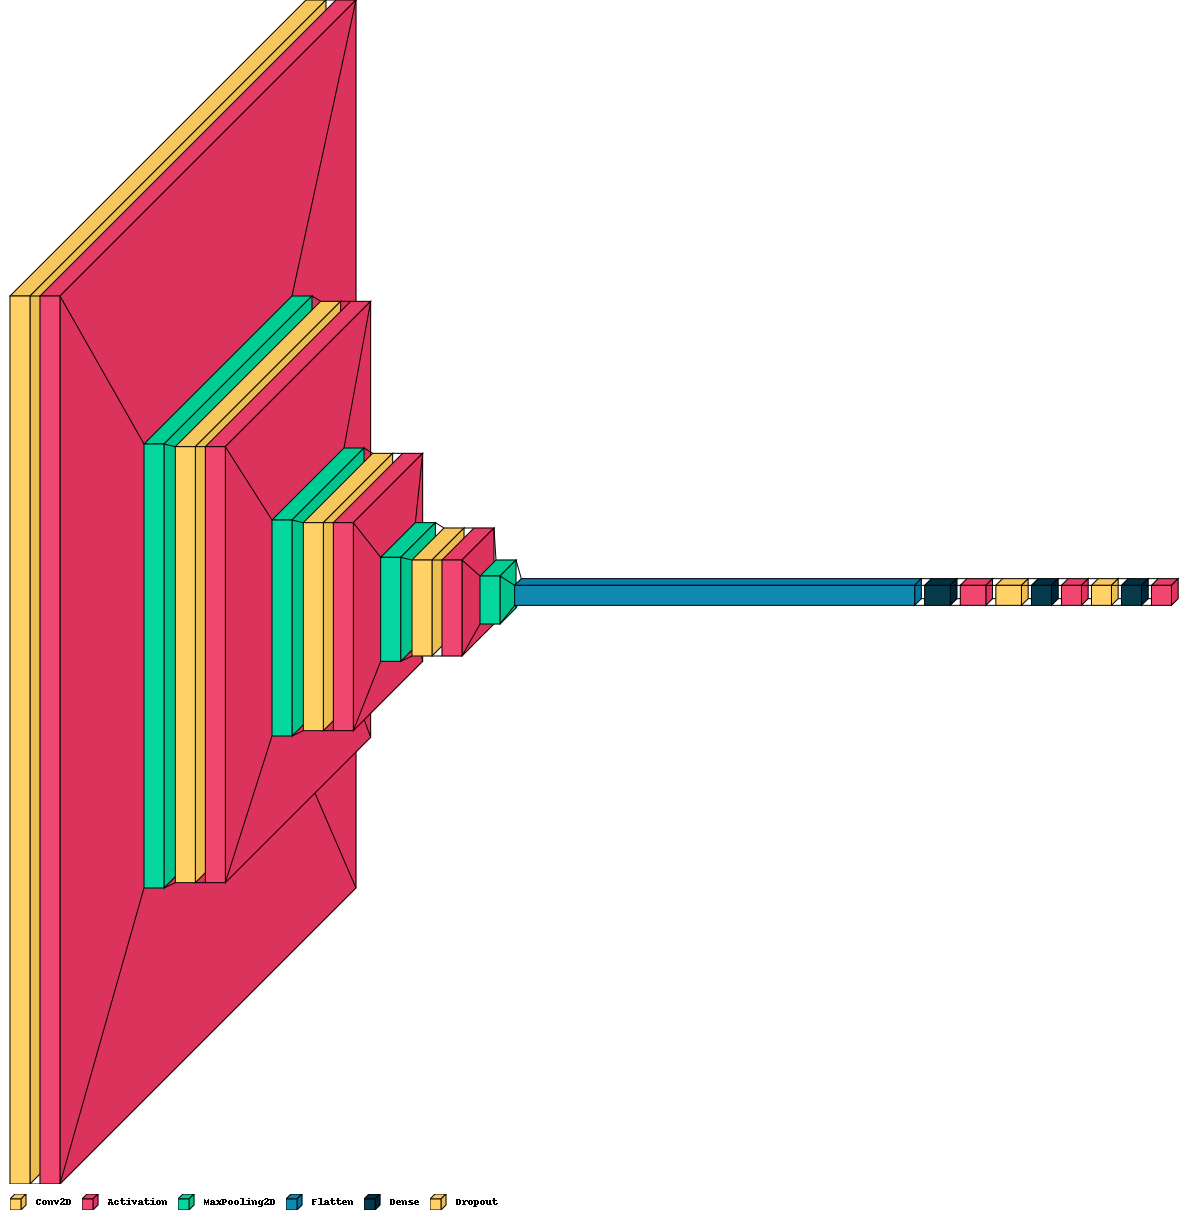

In [9]:
from PIL import ImageFont
import visualkeras
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output.png')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

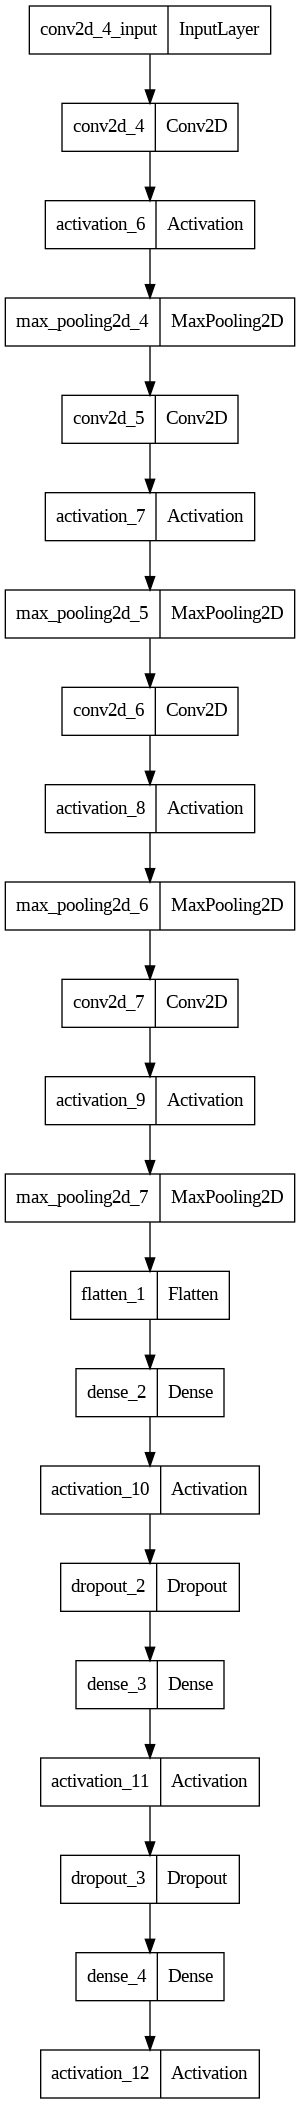

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10
        ,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 85s 766ms/step - loss: 0.4741 - accuracy: 0.7912 - val_loss: 0.3591 - val_accuracy: 0.8516
Epoch 2/10
89/89 [==============================] - 67s 748ms/step - loss: 0.3922 - accuracy: 0.8378 - val_loss: 0.3112 - val_accuracy: 0.8794
Epoch 3/10
89/89 [==============================] - 66s 738ms/step - loss: 0.3625 - accuracy: 0.8528 - val_loss: 0.2971 - val_accuracy: 0.8902
Epoch 4/10
89/89 [==============================] - 66s 740ms/step - loss: 0.3425 - accuracy: 0.8650 - val_loss: 0.3114 - val_accuracy: 0.8683
Epoch 5/10
89/89 [==============================] - 67s 747ms/step - loss: 0.3280 - accuracy: 0.8686 - val_loss: 0.2743 - val_accuracy: 0.8910
Epoch 6/10
89/89 [==============================] - 66s 739ms/step - loss: 0.3155 - accuracy: 0.8770 - val_loss: 0.2619 - val_accuracy: 0.8914
Epoch 7/10
89/89 [==============================] - 66s 744ms/step - loss: 0.2995 - accuracy: 0.8843 - val_loss: 0.2337 - val_accuracy: 0.9109

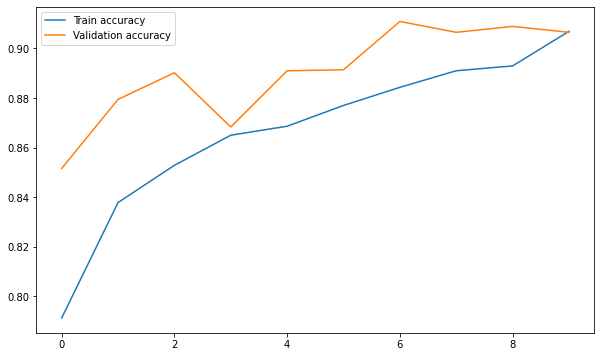

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

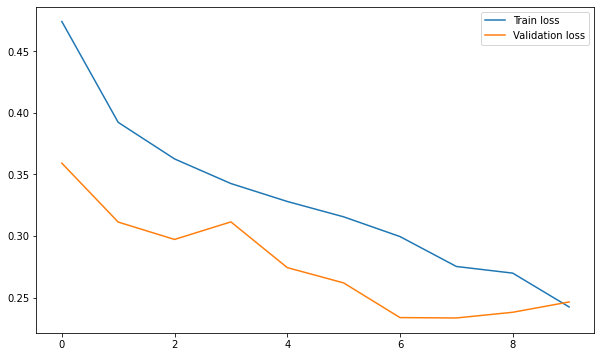

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("Predicted class of image is: Recyclable")
    elif result ==1: print("Predicted class of image is: Organic")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Set up data directories
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=test_generator)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/5
89/89 [==============================] - 160s 2s/step - loss: 0.3686 - accuracy: 0.8617 - val_loss: 0.5705 - val_accuracy: 0.5909
Epoch 2/5
89/89 [==============================] - 103s 1s/step - loss: 0.2670 - accuracy: 0.8921 - val_loss: 0.5862 - val_accuracy: 0.6124
Epoch 3/5
89/89 [==============================] - 103s 1s/step - loss: 0.2377 - accuracy: 0.9059 - val_loss: 0.3862 - val_accuracy: 0.8305
Epoch 4/5
89/89 [==============================] - 103s 1s/step - loss: 0.2305 - accuracy: 0.9072 - val_loss: 0.4434 - val_accuracy: 0.8062
Epoch 5/5
89/89 [==============================] - 103s 1s/step - loss: 0.2179 - accuracy: 0.9128 - val_loss: 0.3344 - val_accuracy: 0.8735


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

# Set up data directories
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=test_generator)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/10
89/89 [==============================] - 91s 962ms/step - loss: 0.6460 - accuracy: 0.7106 - val_loss: 1.1550 - val_accuracy: 0.5579
Epoch 2/10
89/89 [==============================] - 82s 916ms/step - loss: 0.5371 - accuracy: 0.7568 - val_loss: 0.8948 - val_accuracy: 0.5607
Epoch 3/10
89/89 [==============================] - 83s 929ms/step - loss: 0.5015 - accuracy: 0.7736 - val_loss: 0.6494 - val_accuracy: 0.5977
Epoch 4/10
89/89 [==============================] - 81s 904ms/step - loss: 0.4719 - accuracy: 0.7879 - val_loss: 0.5433 - val_accuracy: 0.7346
Epoch 5/10
89/89 [==============================] - 81s 905ms/step - loss: 0.4597 - accuracy: 0.7950 - val_loss: 0.9524 - val_accuracy: 0.5854
Epoch 6/10
89/89 [==============================] - 81s 906ms/step - loss: 0.4462 - accuracy: 0.7997 - val_loss: 0.6614 - val_accuracy: 0.6801
Epoch 7/10
89/89 [==============================] - 81s 9

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3


# Set up data directories
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False




x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=test_generator)
plot_model(model)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet


# Set up data directories
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=256,
        class_mode='binary')
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False




x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=test_generator)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
17225924/17225924 [==============================] - 1s 0us/step
Epoch 1/10
89/89 [==============================] - 89s 835ms/step - loss: 0.2270 - accuracy: 0.9186 - val_loss: 0.1862 - val_accuracy: 0.9300
Epoch 2/10
89/89 [==============================] - 70s 790ms/step - loss: 0.1380 - accuracy: 0.9488 - val_loss: 0.2141 - val_accuracy: 0.9228
Epoch 3/10
89/89 [==============================] - 70s 789ms/step - loss: 0.1207 - accuracy: 0.9553 - val_loss: 0.3296 - val_accuracy: 0.8846
Epoch 4/10
89/89 [==============================] - 70s 783ms/step - loss: 0.1003 - accuracy: 0.9640 - val_loss: 0.2789 - val_accuracy: 0.9029
Epoch 5/10
89/89 [==============================] - 69s 769ms/step - loss: 0.0882 - accuracy: 0.9661 - val_loss: 0.2390 - val_accuracy: 0.9224
Epoch 6/10
89/89 [==============================] - 70s 783ms/step - loss: 0.0814 - accuracy: 0.9688 - val_loss: 0.2883 - val_accuracy: